In [59]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

In [13]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [14]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [18]:
df['Age'].mean()


29.69911764705882

In [28]:
df['Age'].median()

28.0

In [26]:
df['Age'].min()

0.42

In [27]:
df['Age'].max()

80.0

In [25]:
df[df['Age'] == df['Age'].min()]

,Survived,Age,Fare
803,1,0.42,8.5167


In [29]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [31]:
df.sample(5)

,Survived,Age,Fare
566,0,19.0,7.8958
43,1,3.0,41.5792
763,1,36.0,120.0000
95,0,28.0,8.0500
419,0,10.0,24.1500


In [34]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_9068\3218732192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])
C:\Users\PMYLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


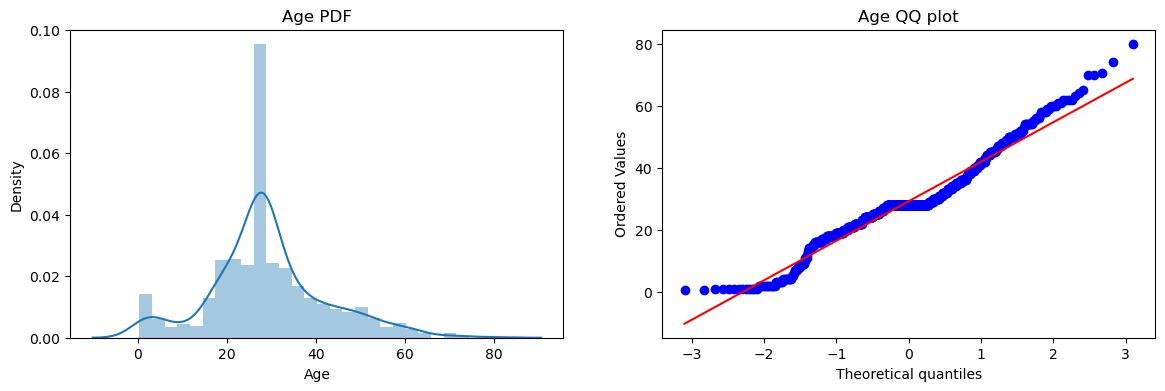

In [49]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')

plt.show()

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_9068\2227206147.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])
C:\Users\PMYLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


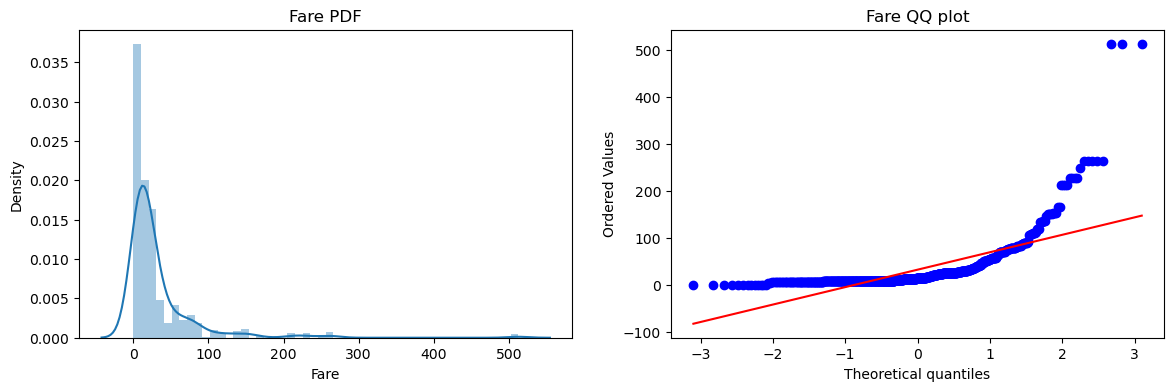

In [50]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot')

plt.show()

In [51]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [52]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
y_pred = clf.predict(X_test)
y_pred_2 = clf2.predict(X_test)

In [54]:
print('LR', accuracy_score(y_pred, y_test))
print('DT', accuracy_score(y_pred_2, y_test))

LR 0.6480446927374302
DT 0.6703910614525139


In [55]:
# Applying function transformer

trf = FunctionTransformer(func=np.log1p)

In [56]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [57]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred_2 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred_2))

Accuracy LR 0.6759776536312849
Accuracy DT 0.6480446927374302


In [61]:
lr_pipeline = Pipeline([
    ('log_transform', FunctionTransformer(func=np.log1p, validate=True)),
    ('clf', LogisticRegression())
])

tree_pipeline = Pipeline([
    ('log_transform', FunctionTransformer(func=np.log1p, validate=True)),
    ('clf', DecisionTreeClassifier())
])

# Perform cross-validation
print("LR", np.mean(cross_val_score(lr_pipeline, X, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(tree_pipeline, X, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6565792759051186


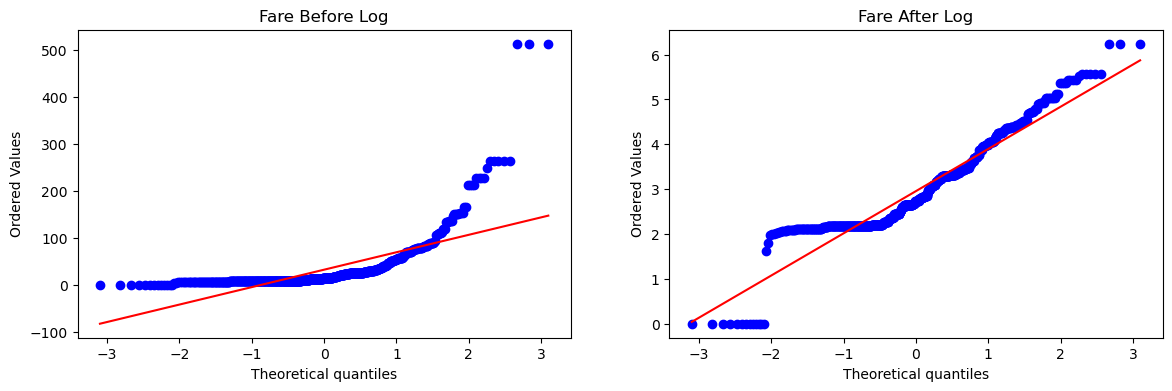

In [62]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

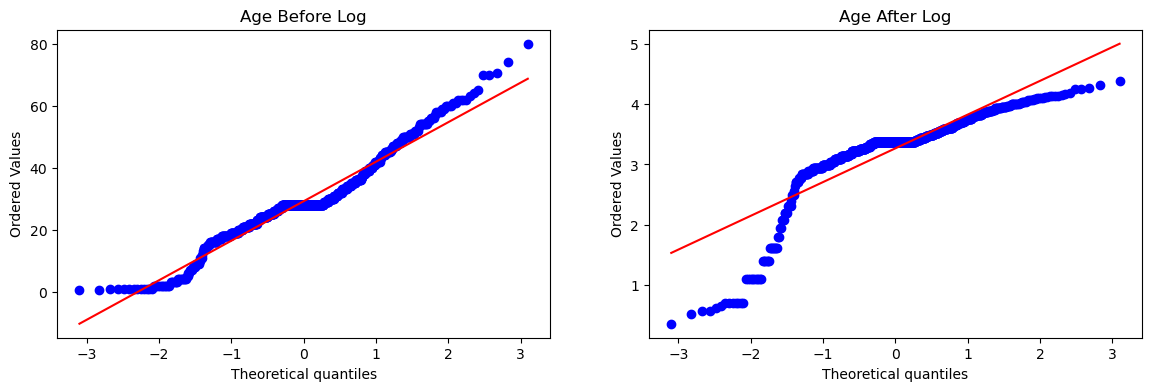

In [63]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [65]:
trf2 = ColumnTransformer([('ft_log', FunctionTransformer(func=np.log1p), ['Fare'])], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [66]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6759776536312849
Accuracy DT 0.659217877094972


In [67]:
lr_pipeline2 = Pipeline([
    ('log_transform', FunctionTransformer(func=np.log1p, validate=True)),
    ('clf', LogisticRegression())
])

tree_pipeline2 = Pipeline([
    ('log_transform', FunctionTransformer(func=np.log1p, validate=True)),
    ('clf', DecisionTreeClassifier())
])

# Perform cross-validation
print("LR", np.mean(cross_val_score(lr_pipeline2, X, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(tree_pipeline2, X, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6610861423220973


In [85]:
def apply_transform(transform):
    X = df.drop('Survived', axis=1)
    y = df['Survived']
    
    #trf = ColumnTransformer(['transform', FunctionTransformer(func=transform), ['Fare']], remainder='passthrough')
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trans, y)
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    stats.probplot(X['Fare'], dist='norm', plot=plt)
    plt.title('Fare Before Transform')
    
    plt.subplot(122)
    stats.probplot(X_trans[:, 0], dist='norm', plot=plt)
    plt.title('Fare After Transform')
    
    plt.show()

Accuracy 0.6015605493133582


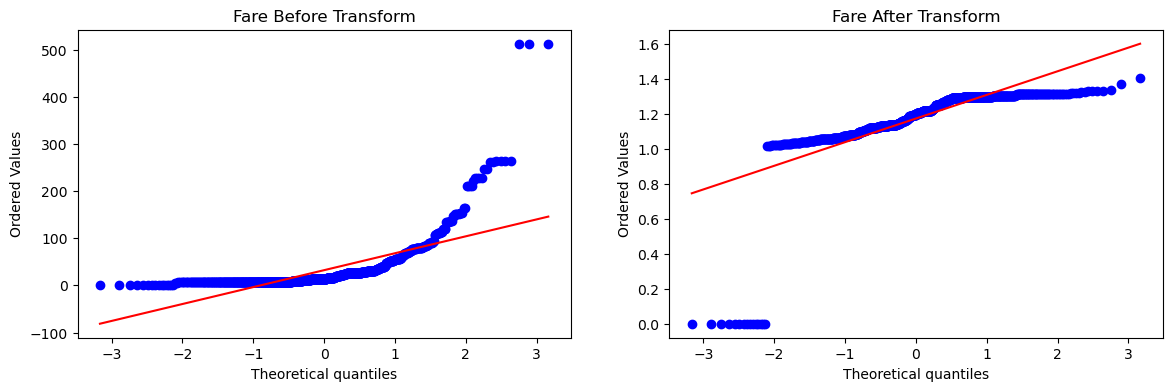

In [94]:
apply_transform(lambda x: x**(1/(x+000000000.1)))

Accuracy 0.6206367041198503


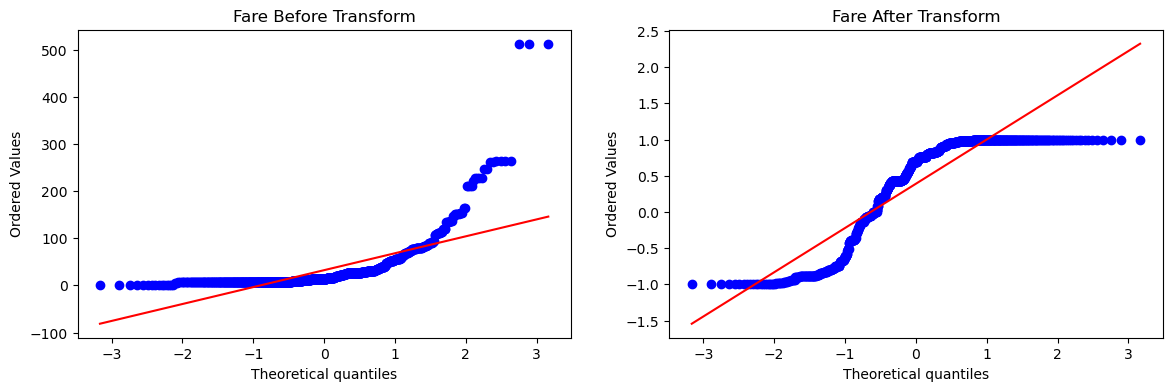

In [95]:
apply_transform(np.sin)